<a href="https://colab.research.google.com/github/sangttruong/Sessionality/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modeling Strategies for Complex Seasonality: A case study**
*Author: Sang Truong*

Department of Economics and Management

DePauw University, Greencastle, IN 46135

* Naive Sinusodal mode
* SARIMA
* Dynamic harmonic SARIMA
* TBATS

Reference: https://otexts.com/fpp2/transformations.html

## **Section 1. Introduction**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.optimize import leastsq
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.tsa.statespace.sarimax as sarimax

! pip install pyramid-arima
from pyramid.arima import auto_arima

! pip install tbats
from tbats import TBATS, BATS

drive.mount('/content/gdrive')
path = 'gdrive/My Drive/Colab Notebooks/DemandForecast/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


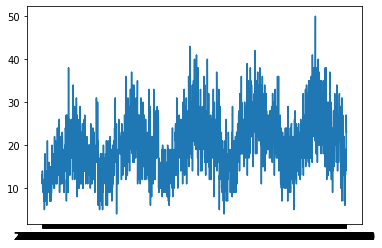

In [0]:
raw = pd.read_csv(path + 'train.csv')
raw11 = raw[(raw.store == 1) & (raw.item == 1) ]
plt.plot(raw11['date'], raw11['sales'])

In [0]:
data = raw11['sales'].values

## **Section 2. Sinusodal model**

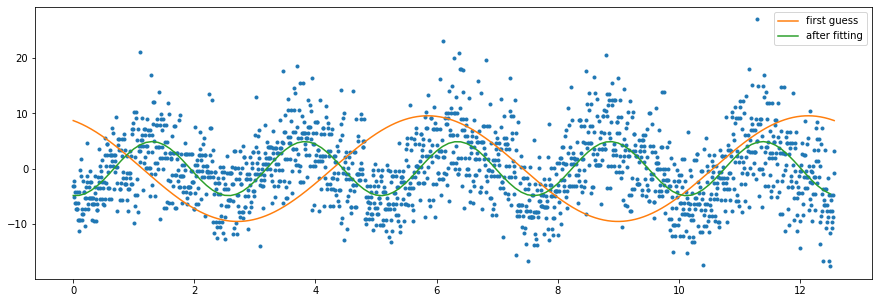

In [0]:
N = len(data)
t = np.linspace(0, 4*np.pi, N)

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 2
guess_freq = 2
guess_amp = -5

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.figure(figsize=(15,5))
plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

## **Section 3. SARIMA model**

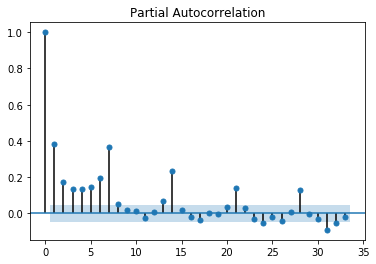

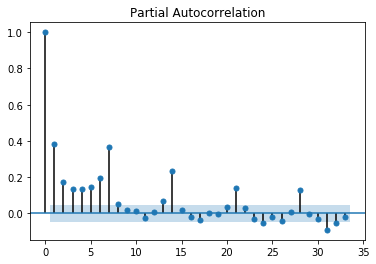

In [0]:
tsaplots.plot_pacf(data)

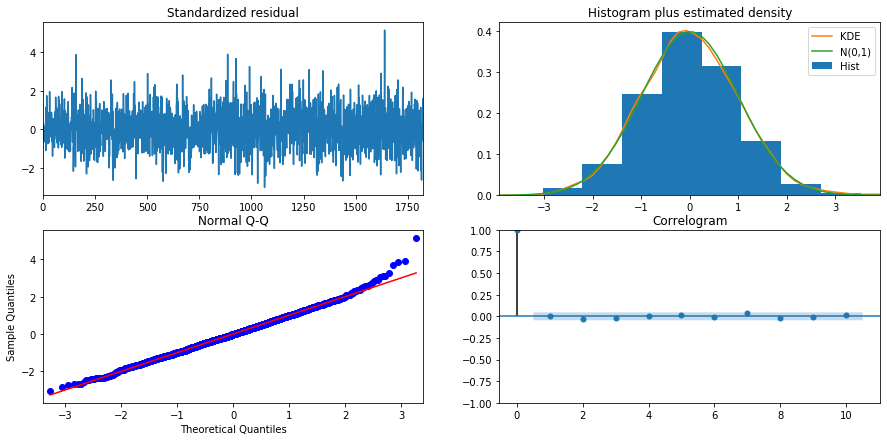

In [0]:
model = sarimax.SARIMAX(data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
result = model.fit()
result.plot_diagnostics(figsize=(15, 7))
plt.show()

In [0]:
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9905      0.004    247.672      0.000       0.983       0.998
ma.L1         -0.8840      0.013    -65.956      0.000      -0.910      -0.858
ar.S.L7        1.0000      0.000   9156.653      0.000       1.000       1.000
ma.S.L7       -0.9967      0.012    -82.339      0.000      -1.020      -0.973
sigma2        21.6040      0.672     32.134      0.000      20.286      22.922


In [0]:
pred = result.predict()

In [0]:
result.aic

10833.669523531084

In [0]:
N = len(data)
t = np.linspace(0, 4*np.pi, N)

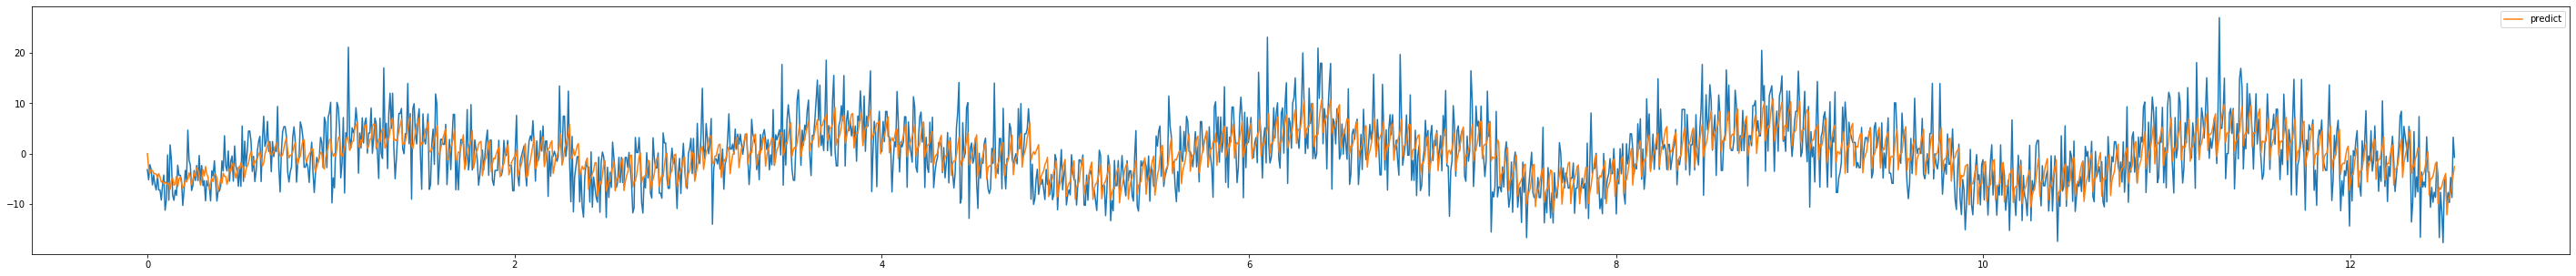

In [0]:
plt.figure(figsize=(50,5))
plt.plot(t, data)
plt.plot(t, pred, label='predict')
# plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [0]:
data = data1

In [0]:
autoarima = auto_arima(data, start_p=0, d=None, start_q=1, max_p=5, max_d=2, max_q=5, start_P=0, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True)

In [0]:
print(autoarima.aic())

11038.468506530218


In [0]:
autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -5507.234
Date:                Sun, 10 Nov 2019   AIC                          11038.469
Time:                        23:03:56   BIC                          11104.587
Sample:                             0   HQIC                         11062.858
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0028      0.031     -0.092      0.927      -0.063       0.057
ar.L1          0.4676      0.015     31.257      0.000       0.438       0.497
ar.L2          0.7813      0.021     37.526      0.000       0.740       0.822
ar.L3         -0.8144      0.014    -57.616      0.000      -0.842      -0.787
ar.L4         -0.4010      0.020    -19.834      0.000      -0.441      -0.361
ar.L5          0.9658      0.015     66.099      0.000       0.937       0.994
ma.L1         -0.3833      0.025    -15.420      0.000      -0.432      -0.335
ma.L2         -0.7240      0.031    -23.363      0.000      -0.785      -0.663
ma.L3          0.7810      0.024     33.231      0.000       0.735       0.827
ma.L4          0.4183      0.032     13.244      0.000       0.356       0.480
ma.L5         -0.8245      0.024    -33.909      0.000      -0.872      -0.777
sigma2        24.1460      0.723     33.417      0.000      22.730      25.562
===================================================================================
Ljung-Box (Q):                      293.13   Jarque-Bera (JB):                25.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
pred = autoarima.predict_in_sample()

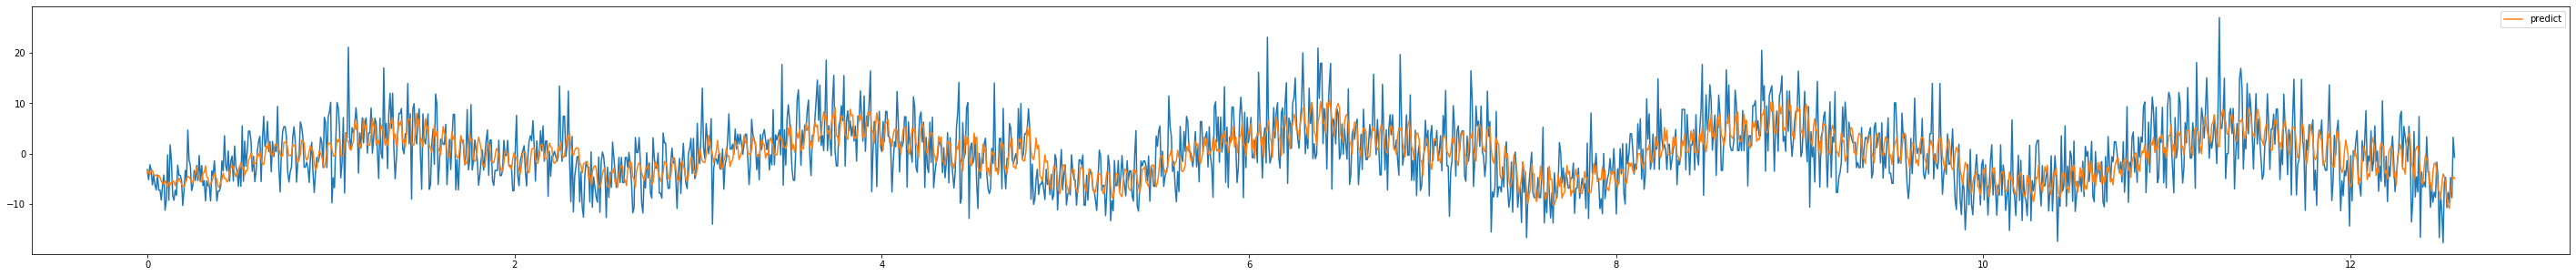

In [0]:
plt.figure(figsize=(50,5))
plt.plot(t, data)
plt.plot(t, pred, label='predict')
# plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

## **Section 4: SARIMA model with Fourier terms**

In [0]:
exog = pd.DataFrame({'date': pd.to_datetime(y['date'])})
exog = exog.set_index(pd.PeriodIndex(exog.date.values, freq='D'))

# Annual sessionality
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)

exog = exog.drop(columns=['date'])

arima_exog_model = auto_arima(y['sales'], exog, seasonal=True, m=7)
arima_exog_model.summary()

In [0]:
exog = pd.DataFrame({'date': pd.to_datetime(y['date'])})
exog = exog.set_index(pd.PeriodIndex(exog.date.values, freq='D'))

# Annual sessionality
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)

# Weekly sessionality
exog['sin7'] = np.sin(2 * np.pi * exog.index.dayofyear / 7)
exog['cos7'] = np.cos(2 * np.pi * exog.index.dayofyear / 7)
exog['sin7_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 7)
exog['cos7_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 7)

exog = exog.drop(columns=['date'])

arima_exog_model = auto_arima(y['sales'], exog, seasonal=False)
arima_exog_model.summary()

## **Section 5. TBATS model**

In [0]:
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(data)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)